# Tujuan
## 1. Perusahaan hendak mengenal lebih baik pelanggannya
## 2. Perusahaan dapat membuat strategi pemasaran yang tepat & efisien
## 3. Teknikal -> Mengelompokan pelanggan berdasarkan kesamaan karakter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from pathlib import Path
from IPython.display import display

In [5]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
# df.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File CSV\customer_segments.csv", index=None, header=True)
# df.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File Excel\customer_segments.xlsx", index=None, header=True)
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [22]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


None

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

1. Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
2. Tidak ada nilai null pada data
3. Dua kolom memiliki tipe data numeric dan lima data bertipe string

Tips:
Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

## Eksplorasi data Numerik

<Figure size 432x288 with 0 Axes>

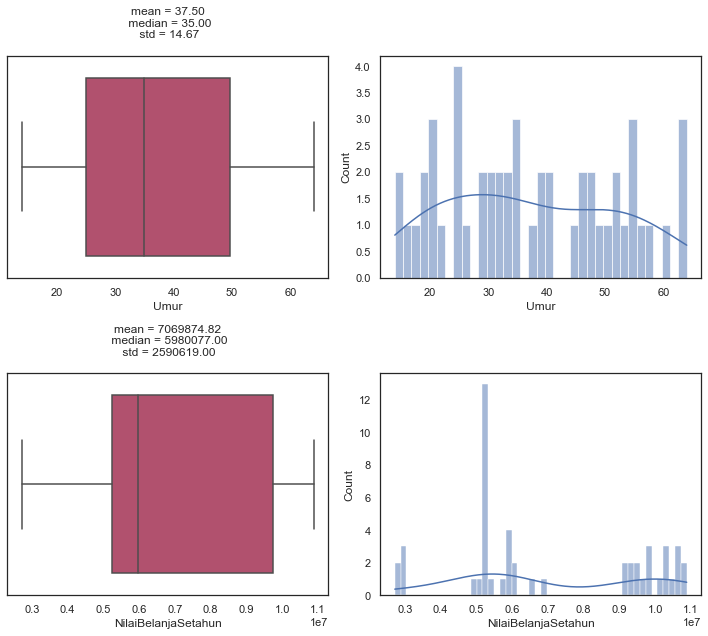

In [38]:
sns.set(style="white")
plt.clf()

def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(x = df[kol], palette="flare", ax = axs[i][0])
        sns.histplot(data = df[kol],bins=df[kol].nunique(), ax = axs[i][1], kde=True)
        axs[i][0].set_title("mean = %.2f\n median = %.2f\n std = %.2f\n" %(df[kol].mean(), df[kol].median(), df[kol].std()))
    # plt.setp(axs)
    plt.tight_layout()
    plt.show()

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]
observasi_num(kolom_numerik)

## Eksplorasi Data Kategorikal

<Figure size 432x288 with 0 Axes>

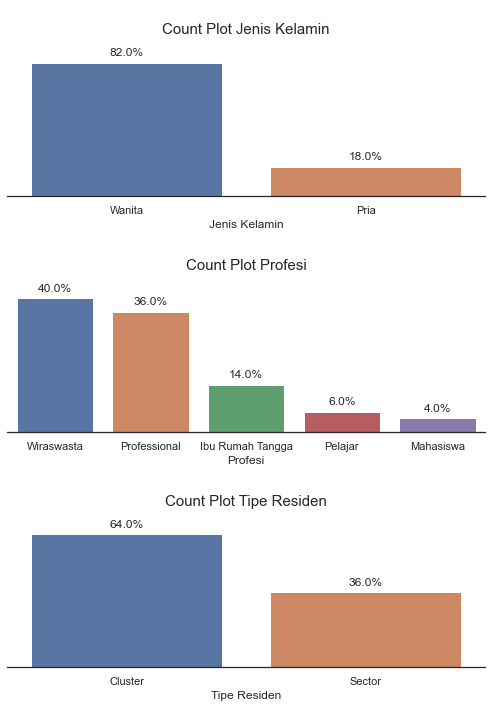

In [120]:
sns.set(style="white")
plt.clf()

kolom_kategorikal = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
fig, axs = plt.subplots(3, 1, figsize=(7, 10))
# print(df.shape[0])

for i, kol in enumerate(kolom_kategorikal):
    sns.countplot(x = df[kol], order=df[kol].value_counts().index, ax = axs[i])
    axs[i].set_title("\nCount Plot %s\n"%(kol), fontsize=15)

    for p in axs[i].patches:
        # print(p)
        total = df.shape[0]
        axs[i].annotate(
                        "{:.1%}".format(p.get_height()/total),
                        xy = (p.get_x() + p.get_width()/2, p.get_height()),
                        ha = "center",
                        va = "center",
                        xytext = (0, 10),
                        textcoords = "offset points"
                       )
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    plt.tight_layout()

plt.show()


Kesimpulan
Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

1. Rata-rata dari umur pelanggan adalah 37.5 tahun
2. Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
3. Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
4. Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
5. Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

Tips:
Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.

## Standarisasi Kolom Numerik

In [128]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]

print("Statistik sebelum Standarisasi")
display(df[kolom_numerik].describe().round())

# Standarisasi
std = StandardScaler()
df_std = std.fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns )
display(df_std.head(10))

print("Statistik setelah Standarisasi")
display(df_std.describe().round())

Statistik sebelum Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,38.0,7069875.0
std,15.0,2590619.0
min,14.0,2722700.0
25%,25.0,5257530.0
50%,35.0,5980077.0
75%,50.0,9739615.0
max,64.0,10884508.0


,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421
5,-0.929356,-0.723055
6,1.824292,1.079078
7,0.998198,-0.719925
8,-0.585150,-0.419818
9,-0.309785,-0.706714


Statistik setelah Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,1.0


In [129]:
from sklearn.preprocessing import MinMaxScaler

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]

print("Statistik sebelum Standarisasi")
display(df[kolom_numerik].describe().round())

# Standarisasi
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df[kolom_numerik])
df_minmax = pd.DataFrame(data=df_minmax, index=df.index, columns=df[kolom_numerik].columns )
display(df_minmax.head(10))

print("Statistik setelah Standarisasi")
display(df_minmax.describe().round())

Statistik sebelum Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,38.0,7069875.0
std,15.0,2590619.0
min,14.0,2722700.0
25%,25.0,5257530.0
50%,35.0,5980077.0
75%,50.0,9739615.0
max,64.0,10884508.0


,Umur,NilaiBelanjaSetahun
0,0.88,0.830113
1,0.00,0.000000
2,0.68,0.314113
3,0.78,0.304075
4,0.54,0.967005
5,0.20,0.305428
6,1.00,0.871689
7,0.76,0.306411
8,0.30,0.400710
9,0.38,0.310562


Statistik setelah Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,1.0
max,1.0,1.0
